#### Loading Libraries 

In [83]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip

#### Loading Chessboard Images for Calibration

Distorted Chess Board Images


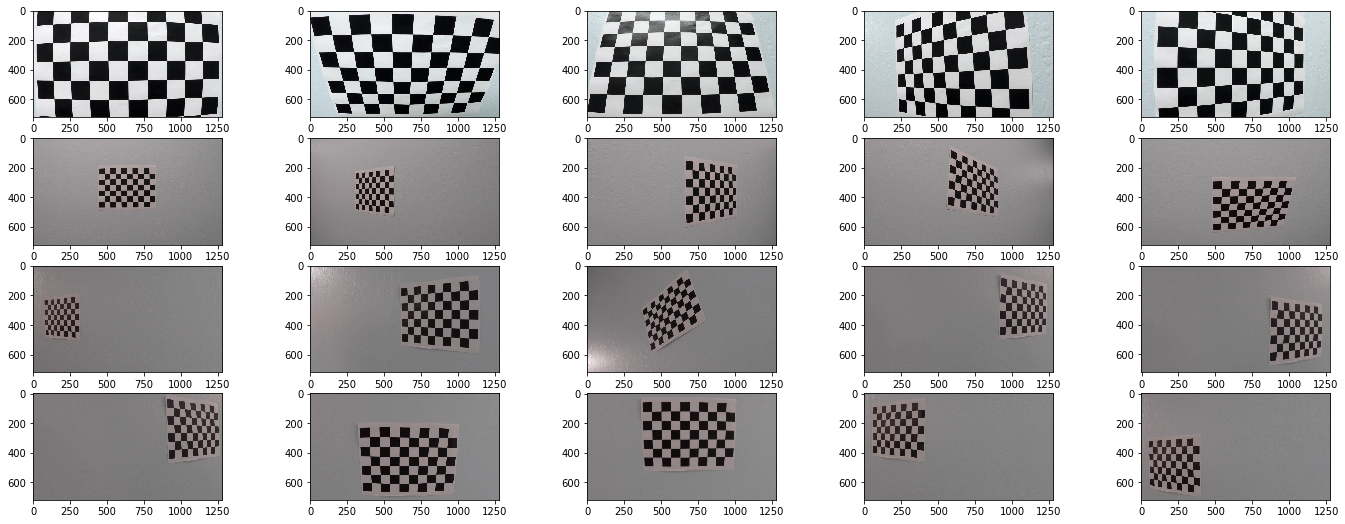

In [2]:
f,axes= plt.subplots(4,5, figsize=(24,9))
row=0
col=0
distorted=[]
print("Distorted Chess Board Images")
for i in range(20):
    image= cv2.imread("./camera_cal/calibration"+str(i+1)+".jpg")
    distorted.append(image)
    #axes[row,col].set_title("Image"+str(i+1))
    axes[row,col].imshow(image)
    col+=1
    if(col==5):
        col=0
        row+=1
    

#### Camera Calibration

In [3]:
#f,axes= plt.subplots(4,5, figsize=(24,9))
#print("Corners plotted Images")
row=0
col=0
nx=9
ny=6
objpoints=[]
imgpoints=[]
objp=np.zeros((nx*ny,3),np.float32)
objp[:,:2]= np.mgrid[0:nx,0:ny].T.reshape(-1,2)

for image in distorted:
    
    gray= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ret, corners= cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if(ret):
        objpoints.append(objp)
        imgpoints.append(corners)
#         cv2.drawChessboardCorners(gray,(nx,ny), corners, ret)
#         axes[row,col].imshow(image)
        col+=1
        if(col==5):
            col=0
            row+=1

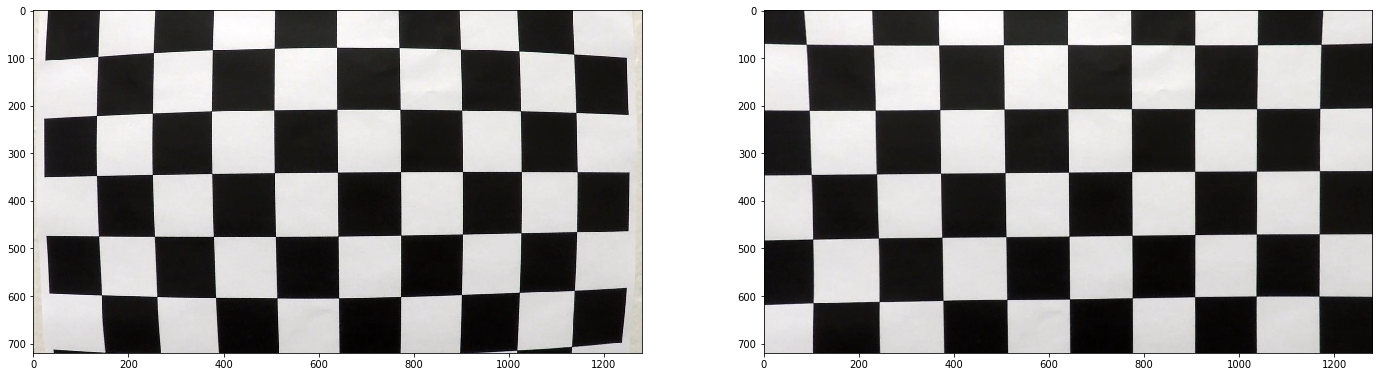

In [4]:
image_test= cv2.cvtColor(cv2.imread("./camera_cal/calibration1.jpg"),cv2.COLOR_BGR2RGB)
y=image_test.shape[0]
x=image_test.shape[1]
_,mtx,dist,_,_= cv2.calibrateCamera(objpoints, imgpoints,(y,x),None,None)
undistorted_image= cv2.undistort(image_test,mtx,dist, None, mtx)
f,axes= plt.subplots(1,2, figsize=(24,9))
axes[0].imshow(image_test)
axes[1].imshow(undistorted_image)



#### Undistortion

Distortion correction on test images


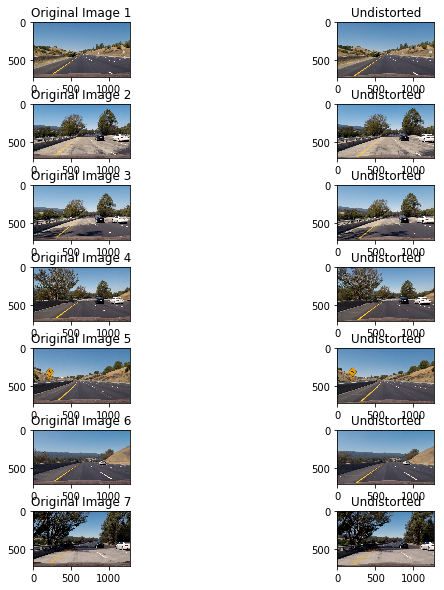

In [32]:
image_test1= cv2.imread("./test_images/straight_lines1.jpg")
image_test2= cv2.imread("./test_images/test1.jpg")
image_test3= cv2.imread("./test_images/test4.jpg")
image_test4= cv2.imread("./test_images/test6.jpg")
image_test5= cv2.imread("./test_images/test2.jpg")
image_test6= cv2.imread("./test_images/test3.jpg")
image_test7= cv2.imread("./test_images/test5.jpg")
test_images=[image_test1,image_test2,image_test3,image_test4,image_test5,image_test6,image_test7]
row=0
f,axes= plt.subplots(len(test_images),2, figsize=(10,10))
f.subplots_adjust(hspace=0.5)
print("Distortion correction on test images")
def undistort(img):
    return cv2.undistort(img,mtx,dist, None, mtx)

for image in test_images:
    image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    y=image.shape[0]
    x=image.shape[1]
    axes[row,0].set_title('Original Image '+str(row+1))
    axes[row,0].imshow(image)
    undistorted_image= undistort(image)
    axes[row,1].imshow(undistorted_image)
    axes[row,1].set_title('Undistorted')
    row+=1

#### Perspective transform

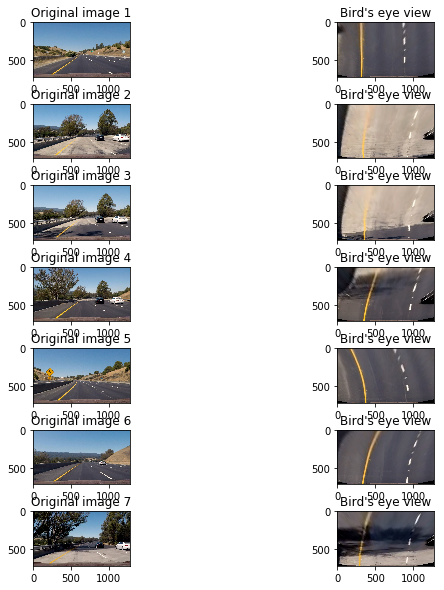

In [36]:
offset=300
height, width= image_test1.shape[0], image_test1.shape[1]
src=np.float32([(593,450),(700,450),(1200,700),(200,700)])
dst=np.float32([(offset,0),(width-offset,0),(width-offset,height),(offset,height)])
def unwarp_image(img):
    img_size = (img.shape[1], img.shape[0])
    M= cv2.getPerspectiveTransform(src, dst) 
    inv= cv2.getPerspectiveTransform(dst, src)
    warped= cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped,inv

def reverse_warping(img,M):
    img_size = (img.shape[1], img.shape[0])
    unwarped= cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return unwarped

f,axes= plt.subplots(len(test_images),2, figsize=(10,10))
f.subplots_adjust(hspace=0.5)
row=0
Unwarped_images=[]

def ConvertBGRtoRGB(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

for image in test_images:
    image= ConvertBGRtoRGB(image)
    unwarped_image,inv= unwarp_image(image)
    Unwarped_images.append(unwarped_image)
    y=image.shape[0]
    x=image.shape[1]
    axes[row,0].imshow(image)
    axes[row,0].set_title('Original image '+str(row+1))
    axes[row,1].imshow(unwarped_image)
    axes[row,1].set_title("Bird's eye view")
    row+=1    

#### Canny edge detection

In [7]:
def canny_image(img, thresh_min, thresh_max):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kernel_size = 3
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

    return cv2.Canny(blur_gray,thresh_min,thresh_max)

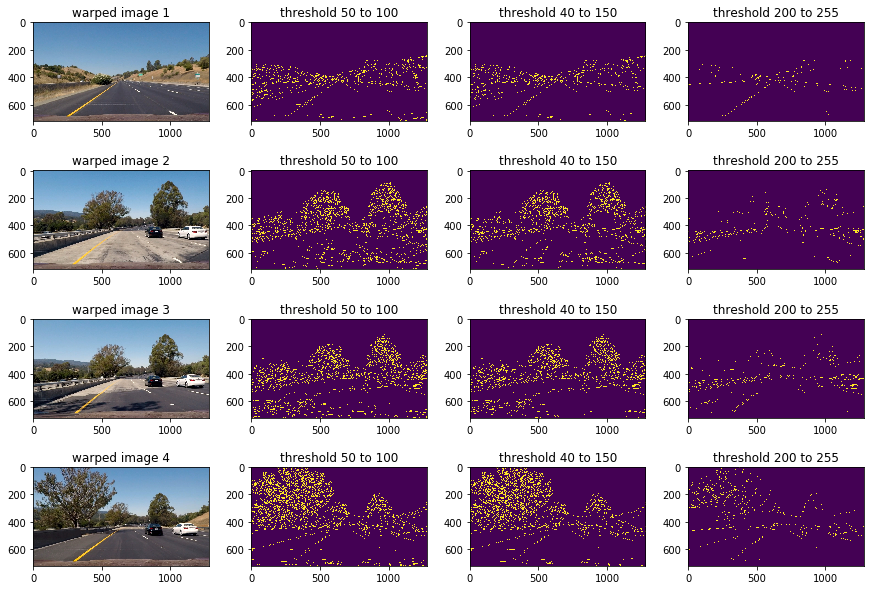

In [8]:
threshCanny= [(50,100),(40,150),(200,255)]

f,axes= plt.subplots(len(Unwarped_images),4, figsize=(15,10))
f.subplots_adjust(hspace =0.5)
row=0
for image in test_images:
    image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    axes[row,0].imshow(image)
    axes[row,0].set_title('warped image '+str(row+1))
    #image= cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,2]
    sobel_applied_image1= canny_image(image,  threshCanny[0][0], threshCanny[0][1])
    axes[row,1].imshow(sobel_applied_image1)
    axes[row,1].set_title('threshold '+str(threshCanny[0][0])+' to '+str(threshCanny[0][1]))
    sobel_applied_image2= canny_image(image,  threshCanny[1][0], threshCanny[1][1])
    axes[row,2].imshow(sobel_applied_image2)
    axes[row,2].set_title('threshold '+str(threshCanny[1][0])+' to '+str(threshCanny[1][1]))
    sobel_applied_image3= canny_image(image,  threshCanny[2][0], threshCanny[2][1])
    axes[row,3].imshow(sobel_applied_image3)
    axes[row,3].set_title('threshold '+str(threshCanny[2][0])+' to '+str(threshCanny[2][1]))
    row+=1

#### Experimenting on various colorSpaces

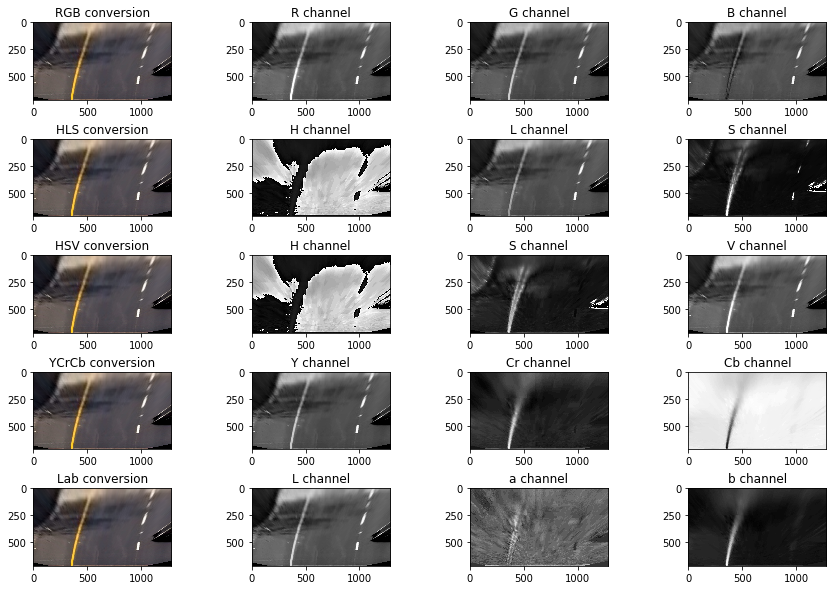

In [9]:

row=0
sample_unwarped_image=Unwarped_images[3] ##  test4.jpg : This image has dark and bright portions and will be good to observe
titles=[['R','G','B'],['H','L','S'],['H','S','V'],['Y','Cr','Cb'],['L','a','b']]
color_spaces=[cv2.COLOR_RGB2HLS,cv2.COLOR_RGB2HSV, cv2.COLOR_RGB2YCrCb, cv2.COLOR_RGB2Lab]
f,axes= plt.subplots(len(color_spaces)+1,4, figsize=(15,10))
f.subplots_adjust(hspace =0.5)
colorspace= None
for index in range(len(color_spaces)+1):
    if(index==0):
        colorspace= sample_unwarped_image
    else:
        colorspace= cv2.cvtColor(sample_unwarped_image,color_spaces[index-1])
    axes[index,0].imshow(sample_unwarped_image)
    axes[index,0].set_title(''.join(titles[index]) +' conversion')
    for channel in range(3):
        this_channel= colorspace[:,:,channel]
        axes[index,channel+1].imshow(this_channel,cmap='gray')
        axes[index,channel+1].set_title(titles[index][channel]+' channel')

Out of the all the channels visualized above, R channel from RGB, S channel from HSV or HLS, Y channel from YCrCb and L channel from Lab colorspace look promising and are able to identify the lane lines easily, which are too bright to identify in the original image itself.

#### Sobel

In [10]:
def sobel_image(img, orient='x', thresh_min=0, thresh_max=255, convert=True):
    
    
    gray= img
    if(convert):
        gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sobel=None
    if(orient=='x'):
        sobel= cv2.Sobel(gray, cv2.CV_64F, 1,0)
    else:
        sobel= cv2.Sobel(gray, cv2.CV_64F, 0,1)
    
    sobel_abs= np.absolute(sobel)
    sobel_8bit= np.uint8(255* sobel_abs/np.max(sobel_abs))
    binary_output= np.zeros_like(sobel_8bit) 
    binary_output[(sobel_8bit>=thresh_min) & (thresh_max>=sobel_8bit)]=1
    
    return binary_output

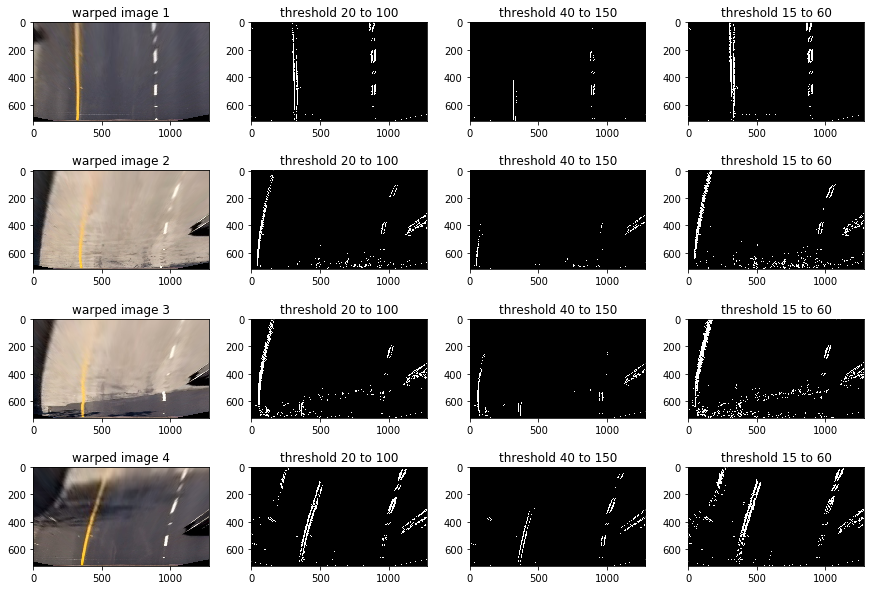

In [11]:
threshVal= [(20,100),(40,150),(15,60)]

f,axes= plt.subplots(len(Unwarped_images),4, figsize=(15,10))
f.subplots_adjust(hspace =0.5)
row=0
for image in Unwarped_images:
    
    axes[row,0].imshow(image)
    axes[row,0].set_title('warped image '+str(row+1))
    #image= cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,2]
    sobel_applied_image1= sobel_image(image, 'x', threshVal[0][0], threshVal[0][1], True)
    axes[row,1].imshow(sobel_applied_image1,cmap='gray')
    axes[row,1].set_title('threshold '+str(threshVal[0][0])+' to '+str(threshVal[0][1]))
    sobel_applied_image2= sobel_image(image, 'x', threshVal[1][0], threshVal[1][1], True)
    axes[row,2].imshow(sobel_applied_image2,cmap='gray')
    axes[row,2].set_title('threshold '+str(threshVal[1][0])+' to '+str(threshVal[1][1]))
    sobel_applied_image3= sobel_image(image, 'x', threshVal[2][0], threshVal[2][1], True)
    axes[row,3].imshow(sobel_applied_image3,cmap='gray')
    axes[row,3].set_title('threshold '+str(threshVal[2][0])+' to '+str(threshVal[2][1]))
    row+=1


In image 2 and 3, the left lane line is completely getting misidentified. Sobel is identifying road edge as the lane line. This is due to the low contrast between lane line and the bright road in these two images.

#### Sobel magnitude

In [12]:
def sobel_mag(img, thresh, convert=True):
    gray= img
    if(convert):
        gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sobelx= cv2.Sobel(gray, cv2.CV_64F, 1,0)
    sobely= cv2.Sobel(gray, cv2.CV_64F, 0,1)
    
    mag= (sobelx**2+ sobely**2)**(0.5)
    
    sobel_mag_8bit= np.uint8(255* mag/np.max(mag))
    binary_output= np.zeros_like(sobel_mag_8bit) 
    binary_output[(sobel_mag_8bit>=thresh[0]) & (thresh[1]>=sobel_mag_8bit)]=1
    
    return binary_output

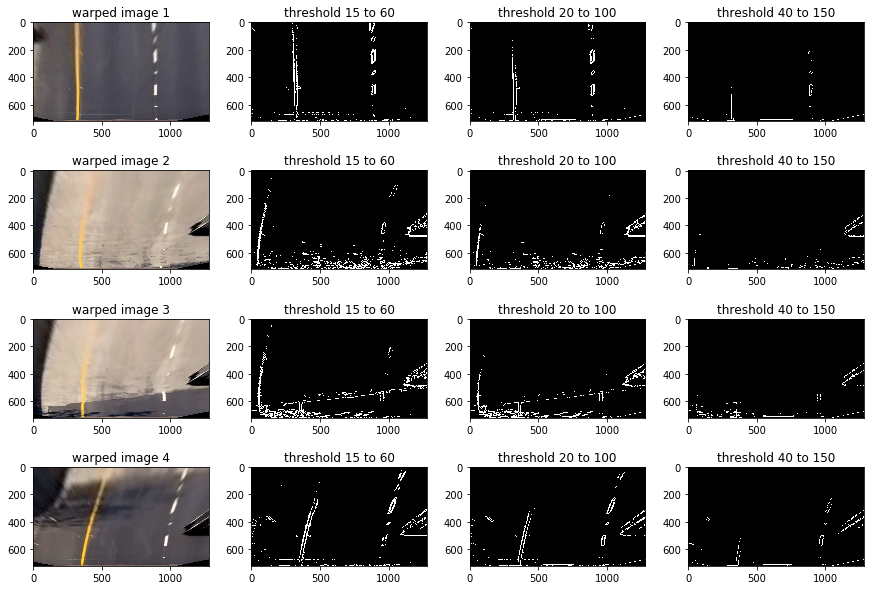

In [13]:
threshMag= [(15,60),(20,100),(40,150)]

f,axes= plt.subplots(len(Unwarped_images),4, figsize=(15,10))
f.subplots_adjust(hspace =0.5)
row=0
convert=True
for image in Unwarped_images:
    
    axes[row,0].imshow(image)
    axes[row,0].set_title('warped image '+str(row+1))
#     convert=False
#     image= cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,2]
    sobel_applied_image1= sobel_mag(image, threshMag[0],convert)
    axes[row,1].imshow(sobel_applied_image1,cmap='gray')
    axes[row,1].set_title('threshold '+str(threshMag[0][0])+' to '+str(threshMag[0][1]))
    sobel_applied_image2= sobel_mag(image,  threshMag[1],convert)
    axes[row,2].imshow(sobel_applied_image2,cmap='gray')
    axes[row,2].set_title('threshold '+str(threshMag[1][0])+' to '+str(threshMag[1][1]))
    sobel_applied_image3= sobel_mag(image,  threshMag[2],convert)
    axes[row,3].imshow(sobel_applied_image3,cmap='gray')
    axes[row,3].set_title('threshold '+str(threshMag[2][0])+' to '+str(threshMag[2][1]))
    row+=1

I can't see any improvement in lane detection using sobel magnitude also. Sobel is not able to detect low contrast lane lines and hence will completely fail in bright road conditions.

#### Sobel Gradient

In [14]:
def sobel_gradient_image(img, thresh=(0, np.pi/2), convert=True):
    gray= img
    if(convert):
        gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sobelx= cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize=15)
    sobely= cv2.Sobel(gray, cv2.CV_64F, 0,1, ksize=15)
    
    abs_sobelx= np.absolute(sobelx)
    abs_sobely= np.absolute(sobely)
    
    grad= np.arctan2(abs_sobely, abs_sobelx)
    
    binary_output=np.zeros_like(grad)
    binary_output[(grad>thresh[0])&(grad<thresh[1])]=1
    return binary_output

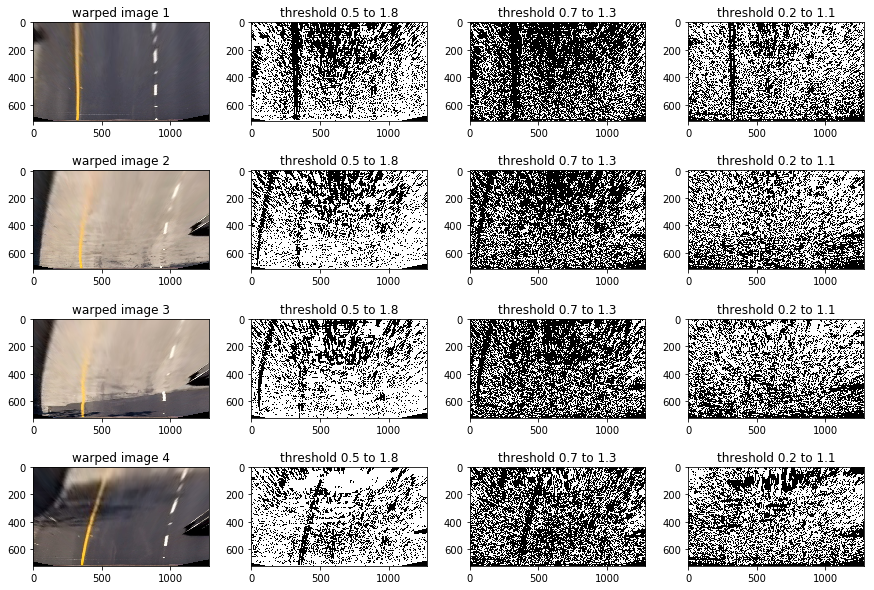

In [15]:
threshGrad= [(0.5,1.8),(0.7,1.3),(0.2,1.1)]

f,axes= plt.subplots(len(Unwarped_images),4, figsize=(15,10))
f.subplots_adjust(hspace =0.5)
row=0
convert=True
for image in Unwarped_images:
    
    axes[row,0].imshow(image)
    axes[row,0].set_title('warped image '+str(row+1))
#     image= cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,2]
#     convert=False
    sobel_applied_image1= sobel_gradient_image(image, threshGrad[0], convert)
    axes[row,1].imshow(sobel_applied_image1,cmap='gray')
    axes[row,1].set_title('threshold '+str(threshGrad[0][0])+' to '+str(threshGrad[0][1]))
    sobel_applied_image2= sobel_gradient_image(image,  threshGrad[1], convert)
    axes[row,2].imshow(sobel_applied_image2,cmap='gray')
    axes[row,2].set_title('threshold '+str(threshGrad[1][0])+' to '+str(threshGrad[1][1]))
    sobel_applied_image3= sobel_gradient_image(image,  threshGrad[2], convert)
    axes[row,3].imshow(sobel_applied_image3,cmap='gray')
    axes[row,3].set_title('threshold '+str(threshGrad[2][0])+' to '+str(threshGrad[2][1]))
    row+=1

Gradient sobel in itself doesn't looks good enough to detect lane lines. Also there is lot of noise in the images. I'll further try to combine the sobel techniques along with the color channels to detect lane lines better and to suppress the detection of road edges in bright as well as dark conditions.

In [16]:
def hls_sthresh(img, thresh=(220, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hls_s = hls[:,:,2]
    hls_s = hls_s*(255/np.max(hls_s))
    # 2) Apply a threshold to the L channel
    binary_output = np.zeros_like(hls_s)
    binary_output[(hls_s > thresh[0]) & (hls_s <= thresh[1])] = 1
    # 3) Return a binary image of threshold result
    return binary_output

#### Combining Sobel with appropriate channels

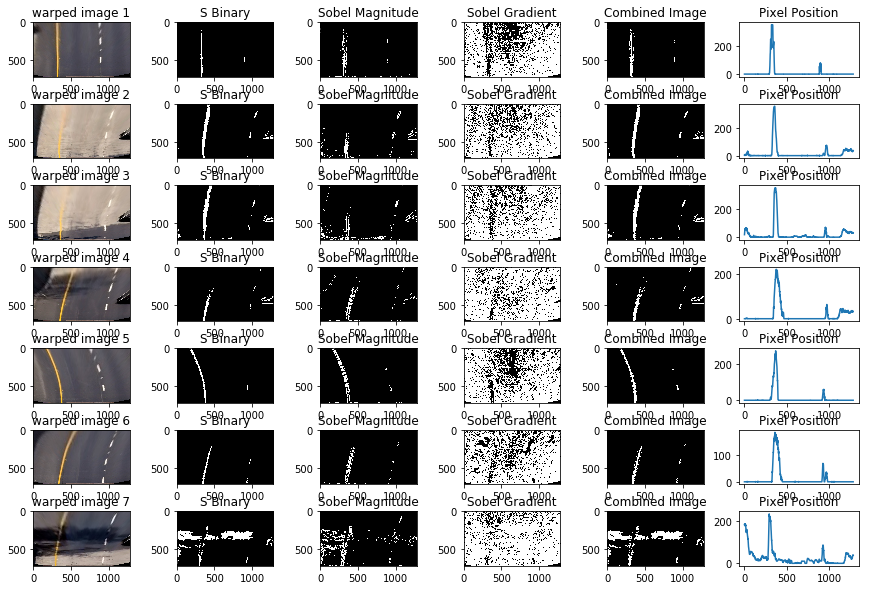

In [44]:
f,axes= plt.subplots(len(Unwarped_images),6, figsize=(15,10))
f.subplots_adjust(hspace =0.5)
row=0
convert=True
Processed_Image=[]
for image in Unwarped_images:
    
    axes[row,0].imshow(image)
    axes[row,0].set_title('warped image '+str(row+1))
    
    #image= cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)[:,:,1]
    convert=False
    Schannel_binary= hls_sthresh(image,(120,255))
    axes[row,1].imshow(Schannel_binary,cmap='gray')
    axes[row,1].set_title('S Binary')
    
    image= cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,2]
    sobel_mag_image= sobel_mag(image, (10,50), convert)
    axes[row,2].imshow(sobel_mag_image,cmap='gray')
    axes[row,2].set_title('Sobel Magnitude')
    sobel_grad_image= sobel_gradient_image(image, (0.3,2.0),convert)
    axes[row,3].imshow(sobel_grad_image,cmap='gray')
    axes[row,3].set_title('Sobel Gradient')
    
    
    
    combined = np.zeros_like(sobel_mag_image)
    combined[((sobel_mag_image == 1) & (sobel_grad_image == 0))|(Schannel_binary==1)] = 1
    
    axes[row,4].imshow(combined,cmap='gray')
    axes[row,4].set_title('Combined Image')
    Processed_Image.append(combined)
    histogram = np.sum(combined[combined.shape[0]//2:,:], axis=0)
    axes[row,5].plot(histogram)
    axes[row,5].set_title('Pixel Position')
    
    
    
    row+=1

In [18]:
def Plot_line(binary_warped):
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    
    
    ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
    quadratic_coeff = 3e-4 
    leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                  for y in ploty])
    rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                    for y in ploty])

    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1] 
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    y_eval = np.max(ploty)
    
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    
    
    return out_img, result, left_fitx,right_fitx,ploty,left_curverad,right_curverad
       
    

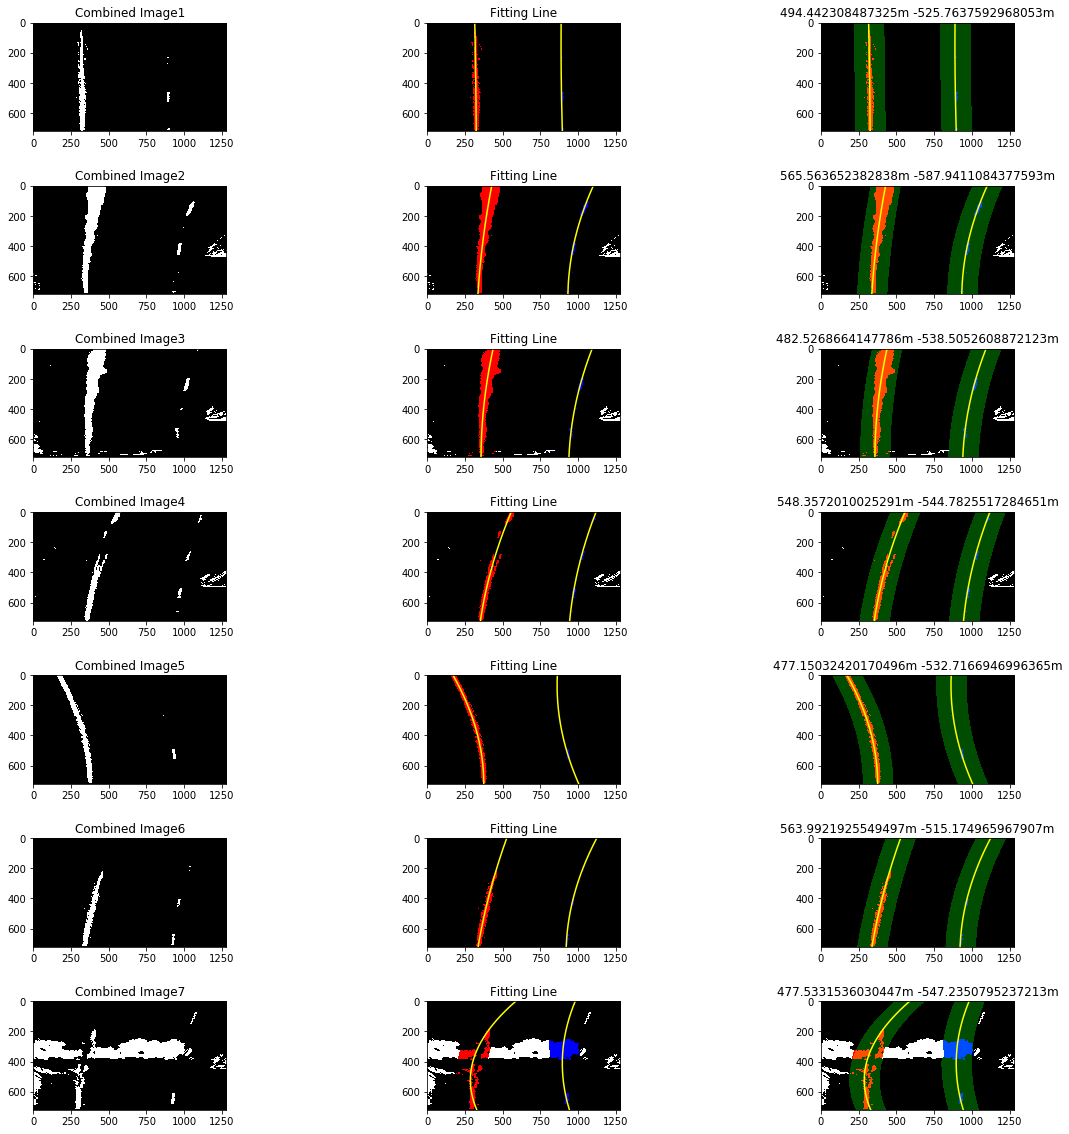

In [38]:
f,axes= plt.subplots(len(Unwarped_images),3, figsize=(20,20))
f.subplots_adjust(hspace =0.5)
row=0

for image in Processed_Image:
    
    axes[row,0].imshow(image,cmap='gray')
    axes[row,0].set_title('Combined Image'+str(row+1))
    
    out_img,out_img1, left_fitx,right_fitx,ploty,left_curverad,right_curverad= Plot_line(image)
    axes[row,1].imshow(out_img)
    axes[row,1].plot(left_fitx, ploty, color='yellow')
    axes[row,1].plot(right_fitx, ploty, color='yellow')
    axes[row,1].set_title('Fitting Line')
    
#     out_img1=fill_line(out_img,left_fitx,right_fitx,ploty,left_lane_inds,right_lane_inds)
    axes[row,2].imshow(out_img1)
    axes[row,2].plot(left_fitx, ploty, color='yellow')
    axes[row,2].plot(right_fitx, ploty, color='yellow')
    axes[row,2].set_title(str(left_curverad)+'m -'+ str(right_curverad)+'m')
    
    row+=1

#### Drawing Lanes

In [80]:
def draw_lane(original_img, Combined_img, left_fitx, right_fitx, M):
    new_img = np.copy(original_img)

    warp_zero = np.zeros_like(Combined_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    h,w = Combined_img.shape
    ploty = np.linspace(0, h-1, num=h)

    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,0), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(255,0,0), thickness=15)

    return color_warp, new_img

#### Pipeline

In [81]:
def Lane_pipeline(img):
    rgb_image= ConvertBGRtoRGB(img)
    undistorted_image= undistort(rgb_image)
    warped_image,M= unwarp_image(undistorted_image)
    Schannel_binary= hls_sthresh(warped_image,(100,255))
    image_S_channel= cv2.cvtColor(warped_image, cv2.COLOR_RGB2HLS)[:,:,2]
    sobel_mag_image= sobel_mag(image_S_channel, (15,60), False)
    sobel_grad_image= sobel_gradient_image(Schannel_binary,  (0.5,1.8), False)
    combined = np.zeros_like(sobel_mag_image)
    combined[((sobel_mag_image == 1) & (sobel_grad_image == 0))|(Schannel_binary==1)] = 1
    out_img,out_img1, left_fitx,right_fitx,ploty,left_curverad,right_curverad= Plot_line(combined)
    laneImage,new_img =draw_lane(rgb_image, combined, left_fitx, right_fitx, M)
    unwarped_image= reverse_warping(laneImage,M)
    laneImage = cv2.addWeighted(new_img, 1, unwarped_image, 0.5, 0)
    return rgb_image,out_img,out_img1,unwarped_image,laneImage

    

#### Testing the pipeline on test images

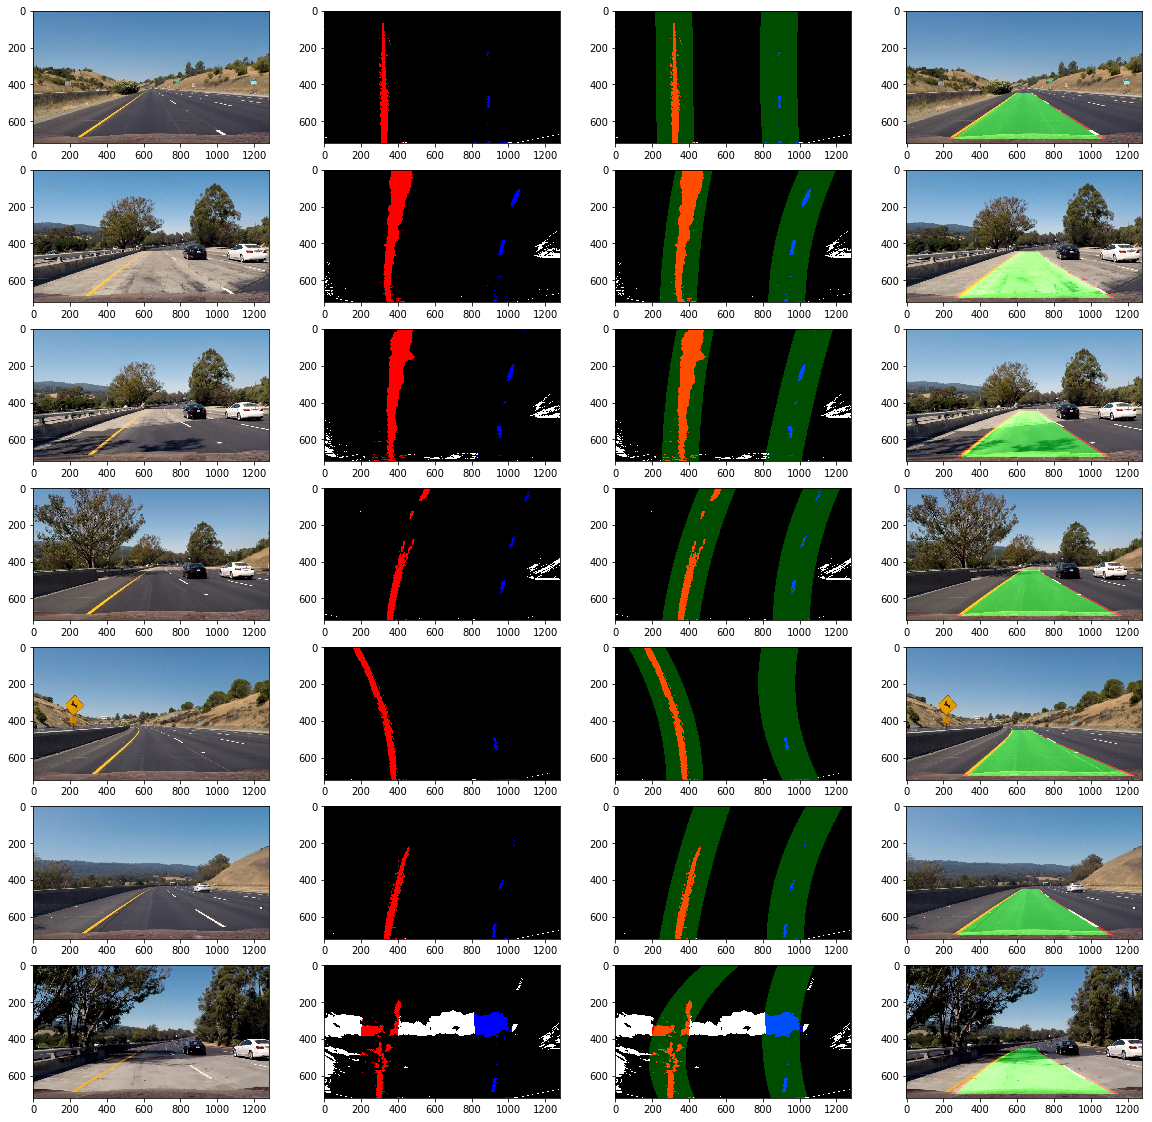

In [79]:
f,axes= plt.subplots(len(test_images),4, figsize=(20,20))
row=0
for image in test_images:
    rgb_image,out_img,out_img1,unwarped_image,laneImage= Lane_pipeline(image)
    
    axes[row,0].imshow(rgb_image)
    axes[row,1].imshow(out_img)
    axes[row,2].imshow(out_img1)
    axes[row,3].imshow(laneImage)
    row+=1

#### Function calling pipeline for Video Creation

In [82]:
def CallPipeline(image):
    rgb_image,out_img,out_img1,unwarped_image,laneImage= Lane_pipeline(image)
    return laneImage



In [84]:
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')#.subclip(22,26)
processed_video = video_input1.fl_image(CallPipeline)
%time processed_video.write_videofile(video_output1, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [06:03<00:00,  3.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 6min 5s


In [86]:
video_output1 = 'challenge_video_output.mp4'
video_input1 = VideoFileClip('challenge_video.mp4').subclip(0,15)
processed_video = video_input1.fl_image(CallPipeline)
%time processed_video.write_videofile(video_output1, audio=False)

[MoviePy] >>>> Building video challenge_video_output.mp4
[MoviePy] Writing video challenge_video_output.mp4


100%|████████████████████████████████████████████████████████████████████████████████| 450/450 [02:18<00:00,  3.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_video_output.mp4 

Wall time: 2min 22s


In [87]:
video_output1 = 'harder_challenge_video_output.mp4'
video_input1 = VideoFileClip('harder_challenge_video.mp4').subclip(0,10)
processed_video = video_input1.fl_image(CallPipeline)
%time processed_video.write_videofile(video_output1, audio=False)

[MoviePy] >>>> Building video harder_challenge_video_output.mp4
[MoviePy] Writing video harder_challenge_video_output.mp4


100%|███████████████████████████████████████████████████████████████████████████████▋| 250/251 [01:58<00:01,  1.33s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harder_challenge_video_output.mp4 

Wall time: 2min 7s
